# 資料處裡

In [70]:
# Essentials
import numpy as np
import pandas as pd
import datetime
import random

# Plots
import seaborn as sns
import matplotlib.pyplot as plt

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

import matplotlib.style as style

In [71]:
paths = os.path.join("sleep_features_min", "train")
raw_data = pd.DataFrame()
for tmp in os.listdir(paths):
    path = os.path.join(paths, tmp)
    data = pd.read_csv(path)
    raw_data = raw_data.append(data, ignore_index=True)
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4666 entries, 0 to 4665
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   datetime       4666 non-null   object 
 1   heart          4666 non-null   float64
 2   breath         4666 non-null   float64
 3   sleep          4666 non-null   float64
 4   tfRSA          4666 non-null   float64
 5   tmHR           4666 non-null   float64
 6   sfRSA          4666 non-null   float64
 7   smHR           4666 non-null   float64
 8   sdfRSA         4666 non-null   float64
 9   sdmHR          4666 non-null   float64
 10  stfRSA         4666 non-null   float64
 11  stmHR          4666 non-null   float64
 12  time           4666 non-null   float64
 13  sleep_counter  4666 non-null   float64
 14  LF             4666 non-null   float64
 15  HF             4666 non-null   float64
 16  LFHF           4666 non-null   float64
 17  mov_dens       4666 non-null   float64
 18  sHF     

In [62]:
# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in raw_data.columns:
    if raw_data[i].dtype in numeric_dtypes:
        if i in ["sleep"]:
            pass
        else:
            numeric.append(i)

# Find skewed numerical features
skew_features = raw_data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.2]
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
high_skew.head(10)

There are 12 numerical features with Skew > 0.5 :


LFHF             20.447177
sLFHF            11.684517
sleep_counter     2.069496
LF                1.174243
sHF               1.172951
HF                1.172478
sdmHR             1.076134
tmHR              1.000081
stmHR             0.877765
tfRSA             0.479589
dtype: float64

In [63]:
# Normalize skewed features
for i in skew_index:
    raw_data[i] = boxcox1p(raw_data[i], boxcox_normmax(raw_data[i] + 1))

# Find skewed numerical features
skew_features = raw_data[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features
skew_index = high_skew.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skew_features.head(10)

There are 18 numerical features with Skew > 0.5 :


heart            0.159004
smHR             0.151383
tmHR             0.067117
sdmHR            0.059530
stmHR            0.058266
tfRSA            0.047281
stfRSA           0.044792
sdfRSA           0.035806
sleep_counter    0.021555
time            -0.012445
dtype: float64

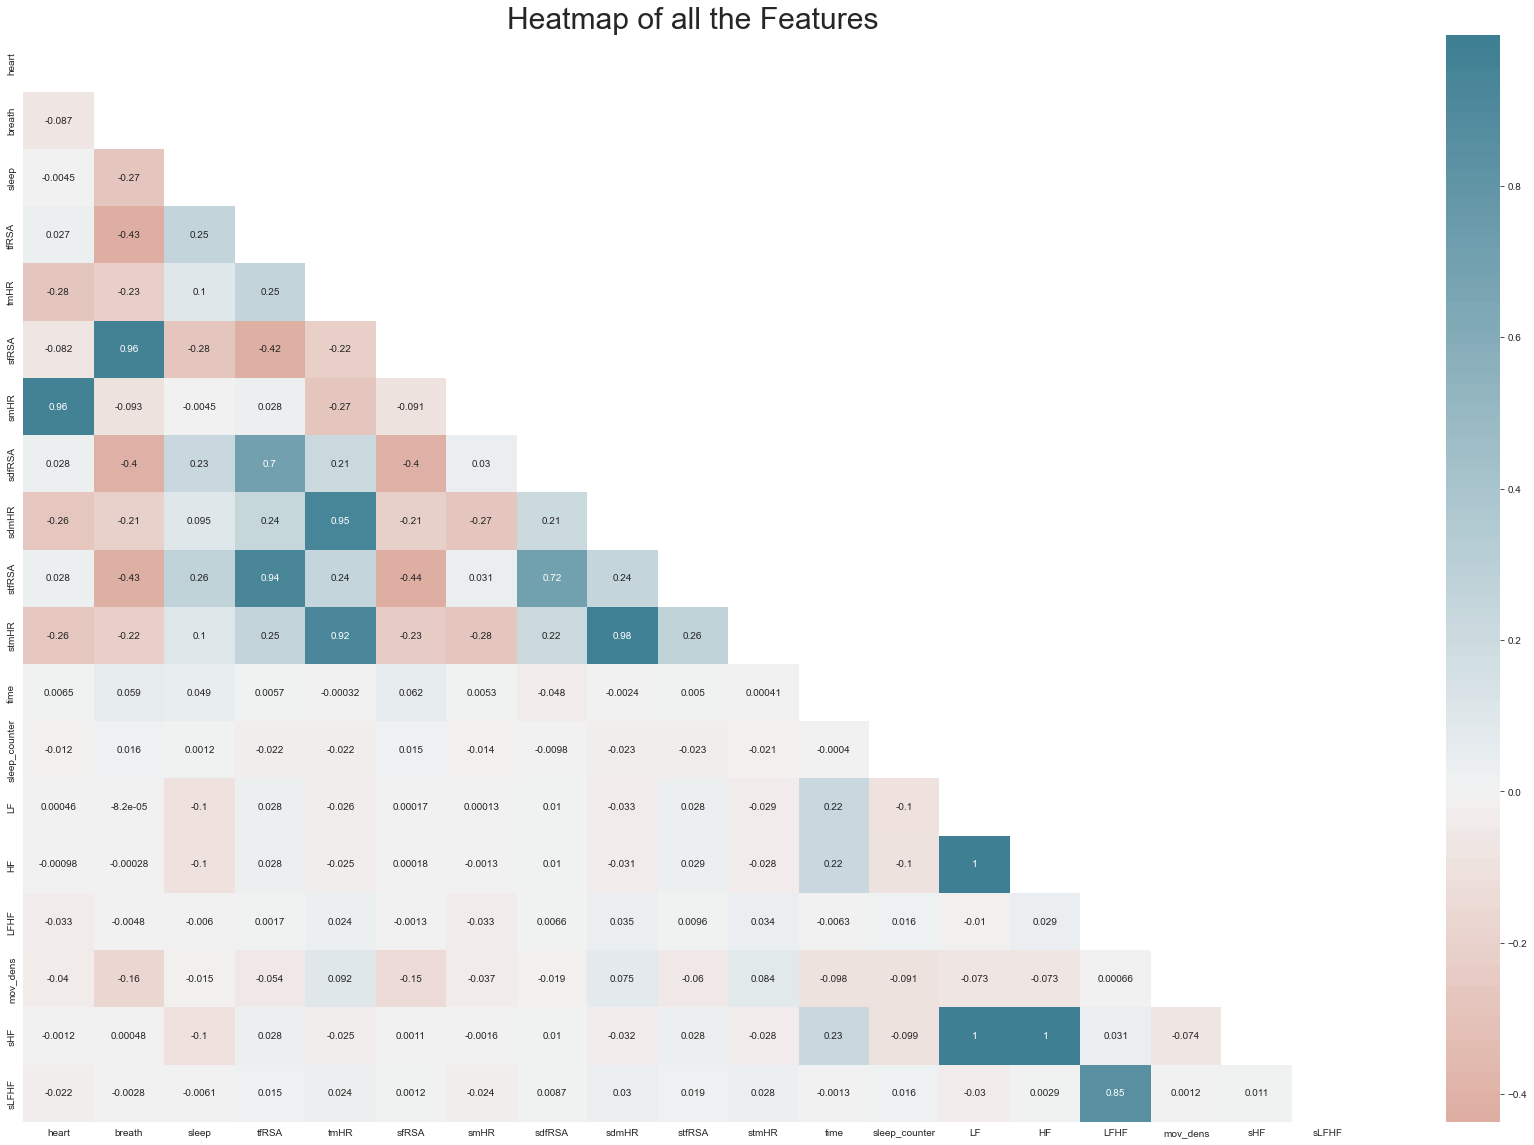

In [64]:
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(raw_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(raw_data.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

In [72]:
y_train = pd.DataFrame(raw_data.pop("sleep"))
raw_data.pop("datetime")
X_train = raw_data
y_train = y_train.astype("int64")

In [73]:
import os
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
import joblib
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
warnings.filterwarnings(action="ignore")

all_data = X_train
all_gt_array = y_train
rf = RandomForestClassifier()
rf.fit(all_data, all_gt_array)
joblib.dump(rf, "save/sleep_feature_min_rf.pkl")
clf_rbf = svm.SVC()
clf_rbf.fit(all_data, all_gt_array) 
joblib.dump(clf_rbf, "save/sleep_feature_min_svm.pkl")
neigh = KNeighborsClassifier(n_neighbors=17)
neigh.fit(all_data, all_gt_array) 
joblib.dump(neigh, "save/sleep_feature_min_knn.pkl")
xgbrmodel = xgb.XGBClassifier()
xgbrmodel.fit(all_data, all_gt_array) 
joblib.dump(xgbrmodel, "save/sleep_feature_min_xgb.pkl")

rf2 = joblib.load('save/sleep_feature_min_rf.pkl')
clf2 = joblib.load('save/sleep_feature_min_svm.pkl')
neigh2 = joblib.load('save/sleep_feature_min_knn.pkl')
xgbrmodel2 = joblib.load('save/sleep_feature_min_xgb.pkl')


[16:28:29] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [74]:
paths = os.path.join("sleep_features_min", "test")
raw_data2 = pd.DataFrame()
for tmp in os.listdir(paths):
    path = os.path.join(paths, tmp)
    data = pd.read_csv(path)
    raw_data2 = raw_data2.append(data, ignore_index=True)

# Fetch all numeric features
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric = []
for i in raw_data2.columns:
    if raw_data2[i].dtype in numeric_dtypes:
        if i in ["sleep"]:
            pass
        else:
            numeric.append(i)

# Find skewed numerical features
skew_features = raw_data2[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.1]
skew_index = high_skew.index

# Normalize skewed features
for i in skew_index:
    raw_data2[i] = boxcox1p(raw_data2[i], boxcox_normmax(raw_data2[i] + 1))


y_test = raw_data2.pop("sleep")
raw_data2.pop("datetime")
X_test = raw_data2
y_test = y_test.astype("int64")
all_data2 = X_test
all_gt_array2 = y_test

RF_ans = rf2.predict(all_data2)
SVM_ans = clf2.predict(all_data2)
KNN_ans = neigh2.predict(all_data2)
XGB_ans = xgbrmodel2.predict(all_data2)
comby = 0.1 * RF_ans + 0.1 * SVM_ans + 0.7 * KNN_ans + 0.1 * XGB_ans
comby = np.array(list(map(round, comby)))

print("RF: ", accuracy_score(RF_ans, all_gt_array2))
print("SVM: ",accuracy_score(SVM_ans, all_gt_array2))
print("KNN: ",accuracy_score(KNN_ans, all_gt_array2))
print("XGB:",accuracy_score(XGB_ans, all_gt_array2))
print("Comby:",accuracy_score(comby, all_gt_array2))

RF:  0.5357933579335793
SVM:  0.5431734317343173
KNN:  0.529889298892989
XGB: 0.5468634686346864
Comby: 0.5291512915129152


In [75]:
def final_windows(ans_ar):
    from scipy import stats
    window_size = 20
    for index in range(2 * (len(ans_ar) // window_size) + 1):
        windows = ans_ar[index*window_size//2:(window_size//2 + index*window_size//2)]
        for tmp in range(window_size//2):
            ans_ar[index*window_size//2:(tmp + index*window_size//2)] = windows[np.argmax(windows)]
    return ans_ar

In [76]:
finial_RF = final_windows(RF_ans)
finial_SVM = final_windows(SVM_ans)
finial_KNN = final_windows(KNN_ans)
finial_XGB = final_windows(XGB_ans)
finial_comby = final_windows(comby)

print("RF: ", accuracy_score(finial_RF, all_gt_array2))
print("SVM: ",accuracy_score(finial_SVM, all_gt_array2))
print("KNN: ",accuracy_score(finial_KNN, all_gt_array2))
print("XGB:",accuracy_score(finial_XGB, all_gt_array2))
print("Comby:",accuracy_score(finial_comby, all_gt_array2))

RF:  0.4959409594095941
SVM:  0.5453874538745388
KNN:  0.5424354243542435
XGB: 0.5047970479704798
Comby: 0.5424354243542435
